# PREDICTING HOUSE PRICES IN KING COUNTY: Multiple Linear Regression Analysis

## Final Project Submission

Please fill out:
* Student name: LEWIS MAWIRA
* Student pace: full time
* Scheduled project review date/time: 7/9/2023
* Instructor name: VERONICA
* Blog post URL:




# 1). DEFINING THE QUESTION

   How can we provide homeowners with advice on how home renovations might increase the estimated value of their homes,           and by what amount?

# a.) SPECYFYING THE DATA ANALYTIC QUESTION

   ##     Problem statement
   
   The aim of this project is to leverage multiple linear regression modeling techniques to predict the estimated value of homes in King County. By analyzing various features such as bedrooms, bathrooms, square footage, and more, our goal is to provide homeowners with valuable insights on how specific home renovations may impact the value of their properties. Ultimately, we seek to offer practical advice to homeowners, empowering them to make informed decisions about home renovations that have the potential to increase the estimated value of their homes.
    
   ##     Main Objective
   
   Our main objective is to develop a robust multiple linear regression model that accurately predicts the estimated value of homes in King County. By analyzing the relationships between various features and sale prices, our model will provide insights into how specific home renovations impact the estimated value. Through this analysis, we aim to empower homeowners with actionable recommendations, enabling them to make informed decisions about home renovations that have the potential to increase the value of their properties.

# b.) DEFINING THE METRICS FOR SUCCESS

   The project will be considered a success if:

1. The predictive model achieves an R-squared (R²) value of at least 70%. This indicates that the model can explain a significant portion of the variation in the estimated home values based on the selected features.

2. The Mean Absolute Percentage Error (MAPE) of the model is less than or equal to 30%. MAPE measures the average percentage difference between the predicted and actual values. A MAPE of 30% or lower indicates that, on average, the model's predictions deviate by no more than 30% from the actual values.

# c.) RECORDING THE EXPERIMENTAL DESIGN

**1. Data Collection**

We obtained the King County House Sales dataset, which contains information on house sales in the county. This dataset includes various features such as the number of bedrooms, bathrooms, square footage, condition, grade, and location. The target variable is the sale price, which we aim to predict using multiple linear regression modeling.

**2. Data Preprocessing**

Before conducting our analysis, we performed necessary data preprocessing steps, such as handling missing values, data cleaning, and feature selection. These steps ensure the quality and relevance of the data for our modeling process.

**3. Exploratory Data Analysis**

We conducted an initial exploration and visualization of the dataset to gain insights into the distribution of variables, identify any outliers, and understand the relationships between the features and the target variable (estimated home value). This step helps us understand the data and uncover potential patterns or anomalies.

**4. Feature Engineering**

To improve the performance of our regression model, we employed feature engineering techniques. This involved transforming or engineering features, such as scaling, creating interaction terms, and encoding categorical variables. These transformations were performed based on the rationale that they would enhance the predictive capabilities of our regression model.

**5. Model Building**

The process of building our multiple linear regression model included selecting relevant features, splitting the data into training and testing sets, fitting the model to the training data, and evaluating the model's performance using appropriate validation techniques. This iterative approach allowed us to refine our model and achieve better predictive accuracy.

**6. Model Evaluation**

We evaluated our model using key metrics such as R-squared, Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and MeanSquared Error (MSE). These metrics provided insights into the performance of our model and allowed us to compare it against our predefined success metrics. Additionally, we analyzed the strengths and limitations of the model to gain a comprehensive understanding of its predictive capabilities.

**7. Model Improvement**

Based on the evaluation results, we iterated and made improvements to our initial model. This process involved techniques such as feature selection, feature engineering, regularization methods, and exploring alternative regression models. Through these iterations, we aimed to enhance the model's performance and achieve better predictions.

**8. Interpretation of Coefficients**

We discussed the interpretation of the regression coefficients and their significance in relation to the target variable. These coefficients provided valuable insights into the impact of different features on the estimated home value. By understanding these relationships, we gained a deeper understanding of the factors influencing home value.

# d.)  DATA UNDERSTANDING

**1. Dataset Description**

The dataset contains information on house sales in King County, including various features and the sale price. It includes both numerical and categorical variables, representing characteristics such as the number of bedrooms, bathrooms, square footage, condition, grade, and location. Features like waterfront, view, condition, and grade have categorical values that provide additional information about the property. Additionally, features related to the property's location, such as latitude, longitude, and ZIP code, are included. Other features, such as the year built, year renovated, square footage of the house and lot, and number of floors, provide insights into the property's age, size, and layout.

**2. Data Preprocessing**

The dataset may contain missing values or require preprocessing steps, such as handling outliers, scaling features, or encoding categorical variables. We performed necessary data preprocessing steps to ensure data quality and relevance for our analysis. These steps included handling missing values, cleaning the data, and selecting relevant features for our regression modeling.

**3 Exploratory Data Analysis**

We conducted exploratory data analysis to gain insights into the distribution of variables, identify outliers, and understand the relationships between the features and the target variable (estimated home value). This step helped us uncover patterns, trends, and potential data quality issues, providing a solid foundation for our subsequent analysis.

**4. Feature Engineering**

To improve the performance of our regression model, we applied feature engineering techniques. These techniques involved transforming or creating new features, such as scaling, creating interaction terms, and encoding categorical variables. These transformations were based on the rationale that they would enhance the predictive capabilities of our regression model.

**5 Model Building and Evaluation**

We utilized multiple linear regression models as the primary approach for predicting the sale price. The process included selecting relevant features, splitting the data into training and testing sets, fitting the model to the training data, and evaluating the model's performance using appropriate validation techniques. Evaluation metrics such as R-squared, RMSE, MAE, and MAPE were used to assess the model's performance against our predefined success metrics. This allowed us to measure the accuracy and effectiveness of our models in predicting the estimated home values.

In conclusion, our project focuses on predicting house prices in King County using multiple linear regression analysis. By leveraging various features and regression techniques, we aim to provide homeowners with actionable insights and recommendations regarding home renovations that can potentially increase the value of their properties. Through a structured approach involving data collection, preprocessing, exploratory data analysis, feature engineering, model building, evaluation, and interpretation of results, we strive to deliver a comprehensive and valuable analysis for homeowners and stakeholders in the real estate market.

# 2. IMPORTING RELEVANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib nbagg
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

# 3. LOADING THE DATASET

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## 3.1 Checking the data

In [3]:
# Determining the no. of records in our dataset
df.shape

(21597, 21)

The data set contains 21597 rows and 21 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

It can be noted that two columns 'waterfront' and 'yr_renovated' contain missing values but all the others are consistent.We can also see the datatypes of the respective columns here.

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Shows numeric columns and their corresponding measures of central tendency and dispersion.

# 4. DATA WRANGLING

Some features are not relevant to our data analysis so we will exclude them.

In [6]:
# List of features to exclude
exclude_features = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Drop the excluded features from the DataFrame
df = df.drop(exclude_features, axis=1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


From our new columns we can see that the 'waterfront' column has missing values so let us handle that. I come to a conclusion that the missing values in the waterfront indicate that those houses don't have waterfronts hence we will fill our missing values with NO.

In [8]:
df['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [9]:
# Fill missing values in 'waterfront' column with 'NO'
df['waterfront'] = df['waterfront'].fillna('NO')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


Above is a summary of the numeric columns we are going to use after we excluded the unnecessary columns.

In [12]:
# checking for duplicates
df.duplicated().any()

True

Since there are duplicated values we have to deal with that. The 'id' column is the unique identifier of a house so we check if there are duplicates there.


In [13]:
df['id'].duplicated().sum()

177

In [14]:
# dropping the duplicates and keeping the first
df = df.drop_duplicates(subset='id', keep='first')

In [15]:
# checking for duplicates
df.duplicated().any()

False

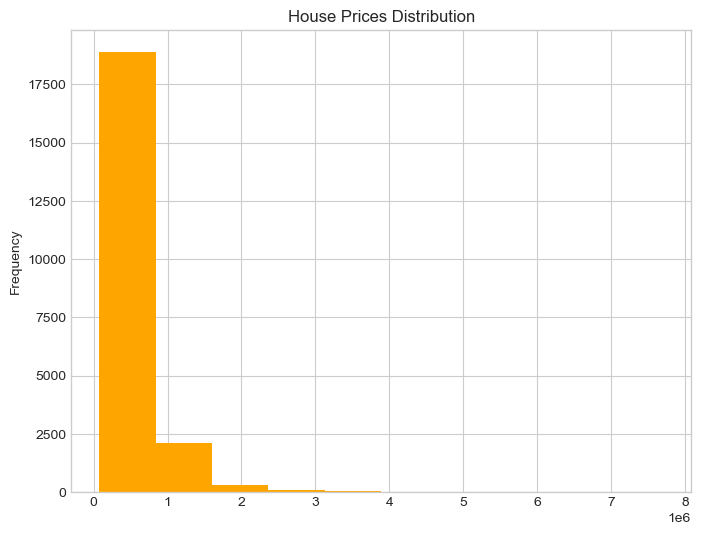

In [16]:
# Plotting insurance expenses distribution
plt.figure(figsize=(8,6))
plt.title("House Prices Distribution")
df['price'].plot(kind = "hist", color="orange");


This data set is a good representation of the reality and is therefore fit for use in the coming up with the prediction model.

#     5.) EXPLORATORY DATA ANALYSIS (EDA)

## 5.1) Univariate Analysis

 There are categorical variables and numeric variables so we identify them.

### 5.2) Univariate analysis for numerical variables

In [17]:
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
df[numeric_columns].describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,1971.092997
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,29.387141
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1952.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


### VISUALIZATIONS OF THE Univariate analysis for numerical variables

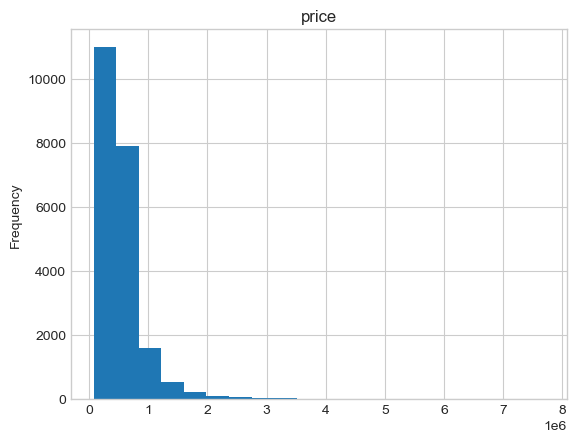

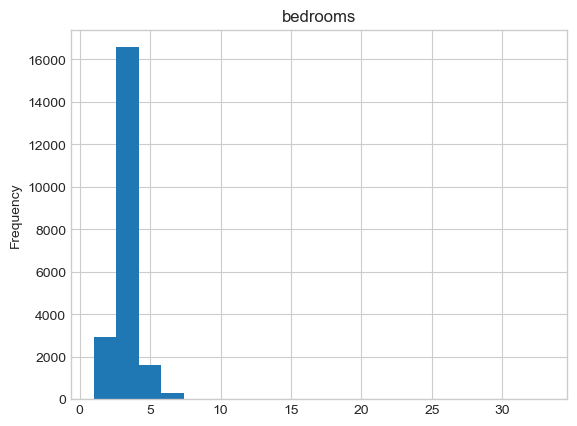

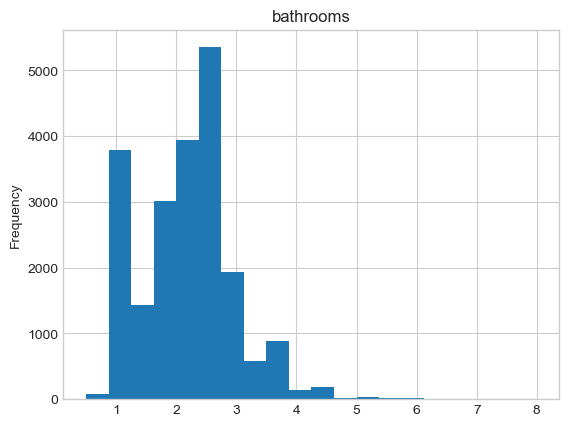

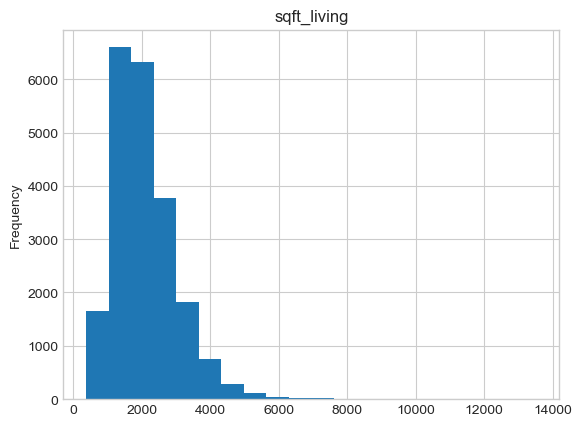

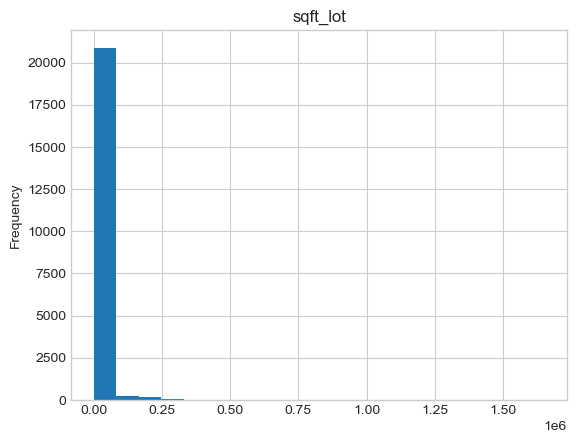

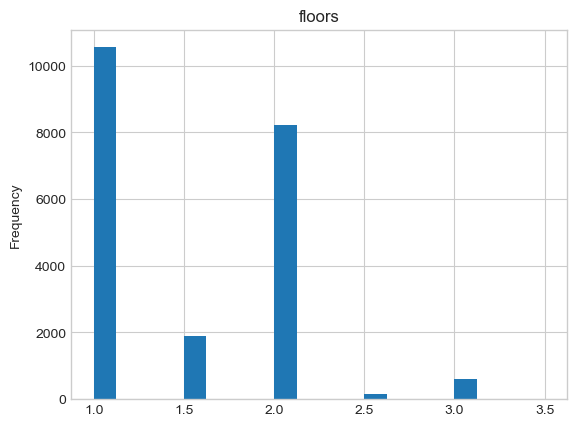

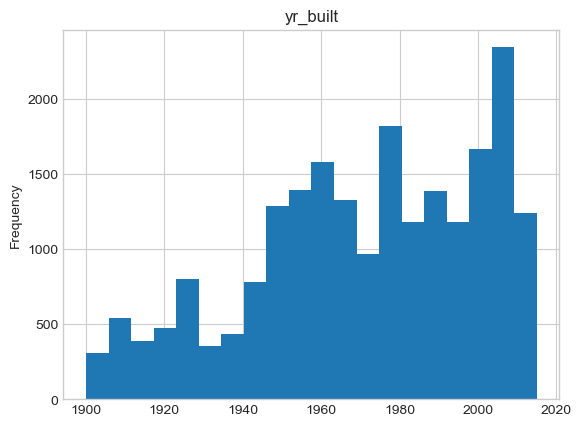

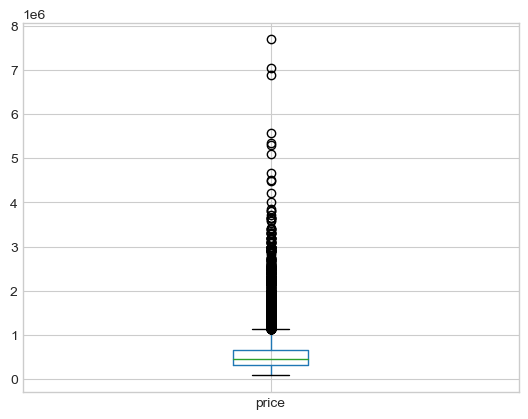

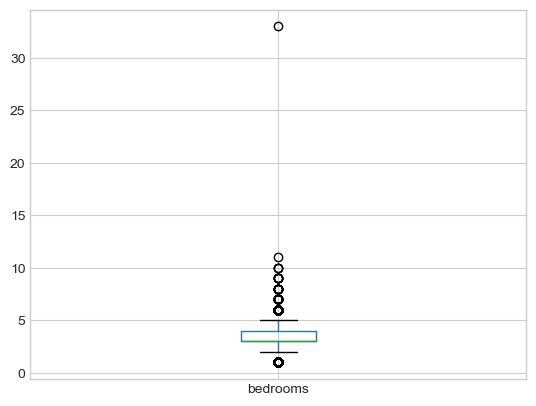

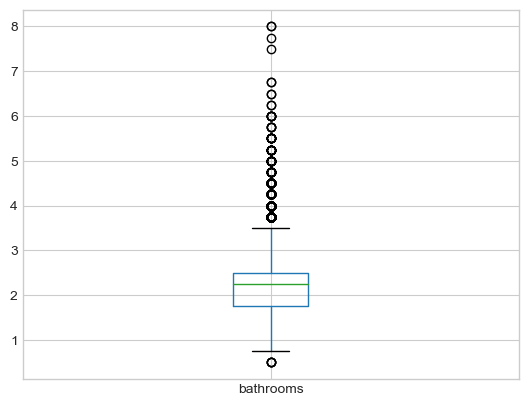

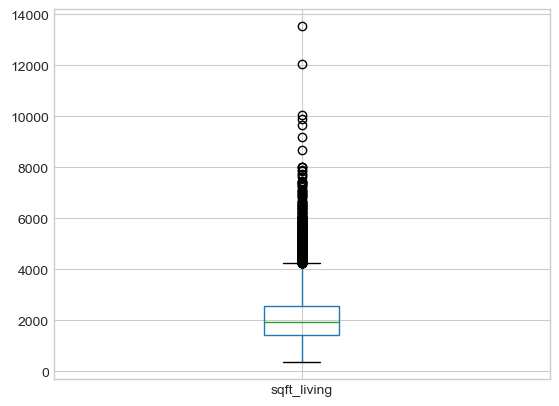

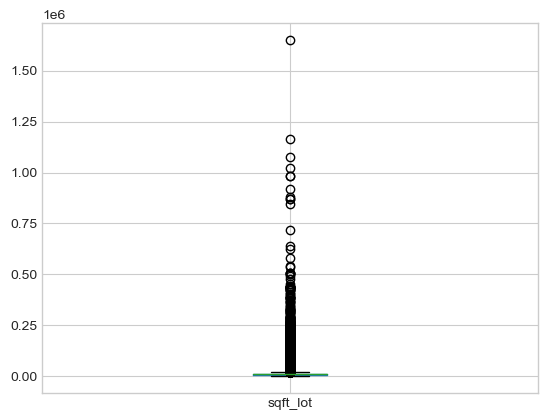

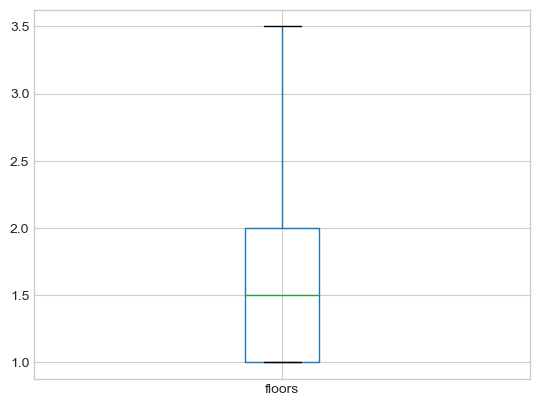

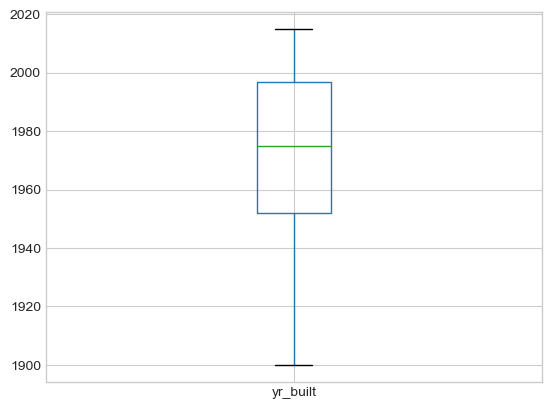

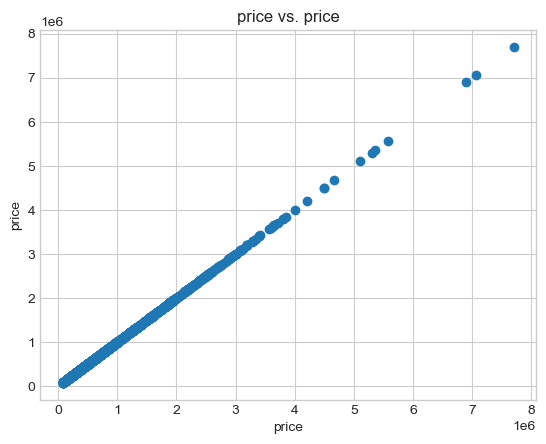

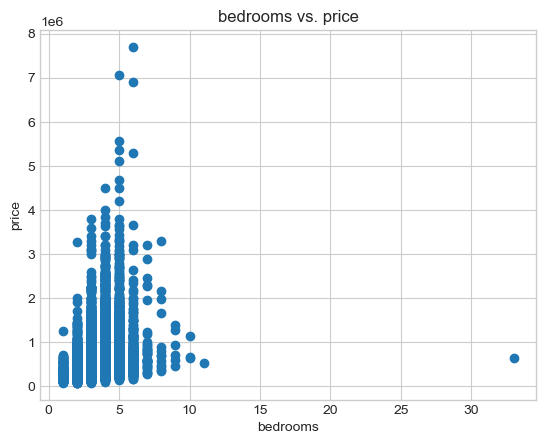

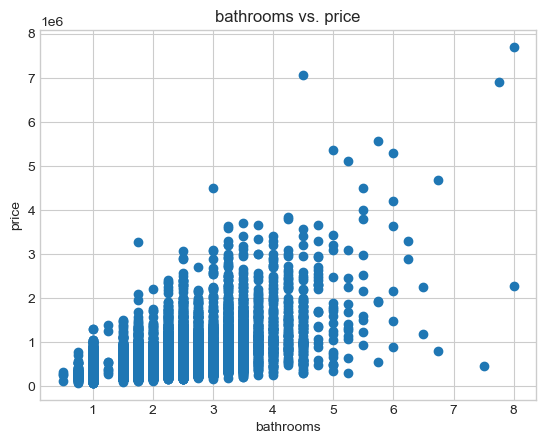

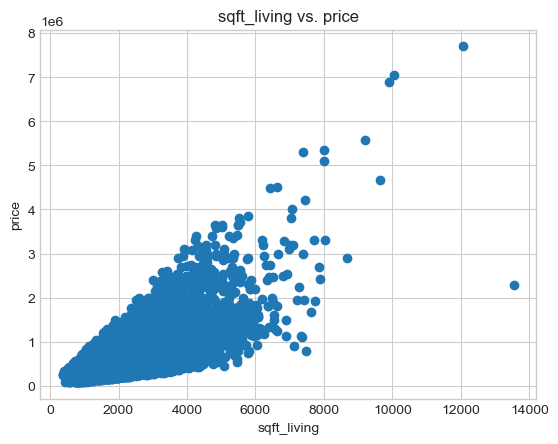

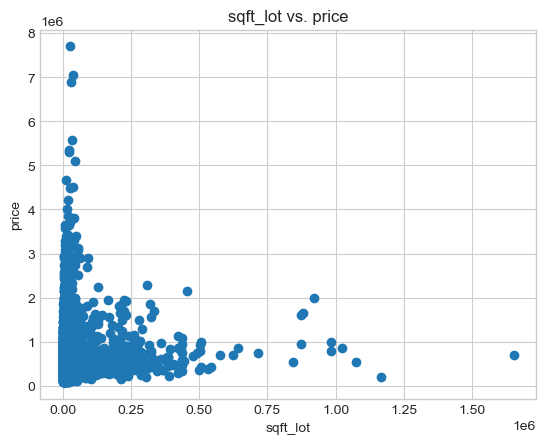

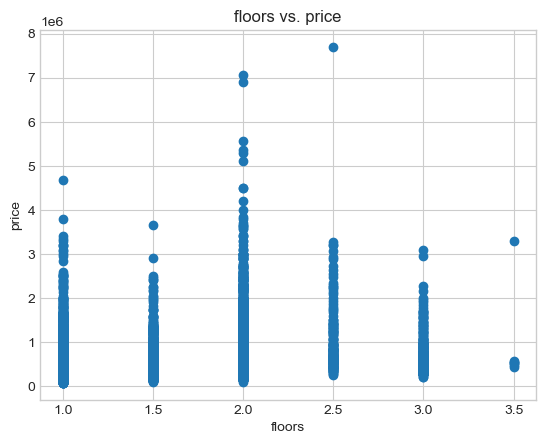

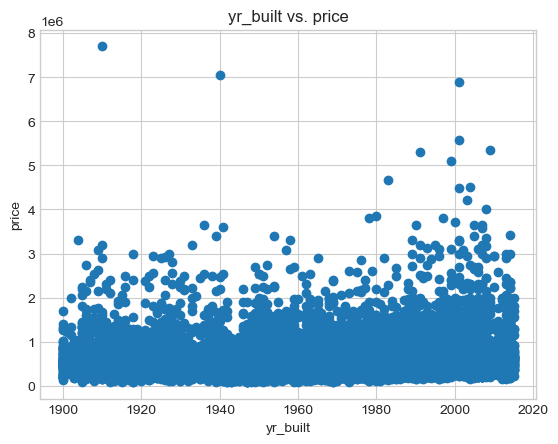

              price      bedrooms     bathrooms   sqft_living      sqft_lot   
count  2.142000e+04  21420.000000  21420.000000  21420.000000  2.142000e+04  \
mean   5.407393e+05      3.373950      2.118429   2083.132633  1.512804e+04   
std    3.679311e+05      0.925405      0.768720    918.808412  4.153080e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.225000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.614000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069050e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors      yr_built  
count  21420.000000  21420.000000  
mean       1.495985   1971.092997  
std        0.540081     29.387141  
min        1.000000   1900.000000  
25%        1.000000   1952.000000  
50%        1.500000   1975.000000  
75%        2.000000   1997.000000  


In [18]:
# Numeric columns
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

# Histogram for each numeric column
for column in numeric_columns:
    plt.figure()
    df[column].plot(kind='hist', bins=20, title=column)
    plt.show()

# Boxplot for each numeric column
for column in numeric_columns:
    plt.figure()
    df.boxplot(column=column)
    plt.show()

# Scatter plot for each numeric column vs. target variable 'price'
for column in numeric_columns:
    plt.figure()
    plt.scatter(df[column], df['price'])
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title(f'{column} vs. price')
    plt.show()

# Summary statistics for each numeric column
summary_stats = df[numeric_columns].describe()
print(summary_stats)

# Correlation analysis between each numeric column and 'price'
correlation = df[numeric_columns + ['price']].corr()
print(correlation)


### INTERPRETATION OF THE RESULTS
1. **'price' (target variable)** has a mean of approximately 540,739 with a standard deviation of 367,931. The minimum price is 78,000, and the maximum price is 7,700,000.
2. **'bedrooms'** has a mean of approximately 3.37, ranging from 1 to 33 bedrooms.
3. **'bathrooms'** has a mean of approximately 2.12, ranging from 0.5 to 8 bathrooms.
4. **'sqft_living'** represents the average square footage of the living area. It has a mean of approximately 2,083 square feet, ranging from 370 to 13,540 square feet.
5. **'sqft_lot'** represents the average square footage of the lot. It has a mean of approximately 15,128 square feet, ranging from 520 to 1,651,359 square feet.
6. **'floors'** represents the number of floors in the house. It has a mean of approximately 1.5, ranging from 1 to 3.5 floors.
7. **'yr_built'** represents the year the house was built. It ranges from 1900 to 2015, with a mean of approximately 1971.

**Histograms:**
Histograms provide a visual representation of the distribution of each numeric variable. 'bedrooms' and 'bathrooms' have discrete distributions, while 'sqft_living' and 'sqft_lot' have continuous distributions.

**Boxplots:**
Boxplots provide a summary of the distribution, including the median, quartiles, and any potential outliers.
You can identify any skewness or variability in the data. For example, 'bedrooms' and 'floors' have outliers, as indicated by the points outside the whiskers.

**Scatter Plots:**
Scatter plots show the relationship between each numeric variable and the target variable ('price').
You can observe the trend and strength of the relationship. For example, 'sqft_living' and 'bathrooms' exhibit a positive correlation with 'price', as the values increase, the 'price' tends to increase as well.

**Correlation Analysis:**
The correlation matrix provides the correlation coefficients between each numeric variable and 'price'.
Positive values closer to 1 indicate a positive correlation, while negative values closer to -1 indicate a negative correlation. Values closer to 0 indicate a weak or no correlation.
In this case, **'sqft_living'** has the **highest positive correlation with 'price' (0.70)**, followed by **'bathrooms' (0.53) and 'bedrooms' (0.31).**
'sqft_lot' and 'yr_built' have **relatively weaker correlations with 'price'** (0.09 and 0.05, respectively).

**LET US NOW DEAL WITH THE OUTLIERS**

In [19]:
df['bedrooms'].value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

This outliers will affect our analysis so we reclassify them into a reasonable category.

In [20]:
df.loc[df['bedrooms'] >= 7, 'bedrooms'] = '77'


In [21]:
df['bedrooms'].value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      191
77      62
Name: count, dtype: int64

The bathrooms columns also has outliers so we reclassify them

In [22]:
df['bathrooms'].value_counts()

bathrooms
2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [23]:
df.loc[df['bathrooms'] > 5, 'bathrooms'] = '55'


In [24]:
df['bathrooms'].value_counts()

bathrooms
2.5     5352
1.0     3794
1.75    3020
2.25    2031
2.0     1913
1.5     1429
2.75    1182
3.0      747
3.5      729
3.25     586
3.75     155
4.0      134
4.5       99
4.25      79
0.75      70
55        43
4.75      23
5.0       21
1.25       9
0.5        4
Name: count, dtype: int64

In [25]:
df['sqft_living'].value_counts()

sqft_living
1300    136
1440    133
1400    132
1660    128
1800    128
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: count, Length: 1034, dtype: int64

In [26]:

# Calculate the z-scores for each data point in the "sqft_living" column
z_scores = (df['sqft_living'] - df['sqft_living'].mean()) / df['sqft_living'].std()

# Define a threshold value above which you consider the data points as outliers
threshold = 3

# Set the reclassified values for the outliers
reclassified_value = 9999  # Value to assign to outliers
df.loc[np.abs(z_scores) > threshold, 'sqft_living'] = reclassified_value

# Print the updated value counts for the reclassified column
print(df['sqft_living'].value_counts())


sqft_living
9999    247
1300    136
1440    133
1400    132
1660    128
       ... 
1975      1
1275      1
1979      1
2577      1
1425      1
Name: count, Length: 875, dtype: int64


handle outliers for the sqft_lot column using Z-Score

In [27]:
df['sqft_lot'].value_counts()

sqft_lot
5000      355
6000      286
4000      249
7200      218
7500      118
         ... 
24330       1
215622      1
6022        1
2323        1
1076        1
Name: count, Length: 9776, dtype: int64

In [28]:

# Calculate the z-scores for each data point in the "sqft_lot" column
z_scores = (df['sqft_lot'] - df['sqft_lot'].mean()) / df['sqft_lot'].std()

# Define a threshold value above which you consider the data points as outliers
threshold = 3

# Set the reclassified values for the outliers
reclassified_value = 9999  # Value to assign to outliers
df.loc[np.abs(z_scores) > threshold, 'sqft_lot'] = reclassified_value

# Print the updated value counts for the reclassified column
print(df['sqft_lot'].value_counts())



sqft_lot
5000     355
9999     343
6000     286
4000     249
7200     218
        ... 
15408      1
25990      1
37913      1
36831      1
1076       1
Name: count, Length: 9504, dtype: int64


###  5.3) Univariate analysis of categorical variables

Counts for waterfront:
waterfront
NO     21274
YES      146
Name: count, dtype: int64



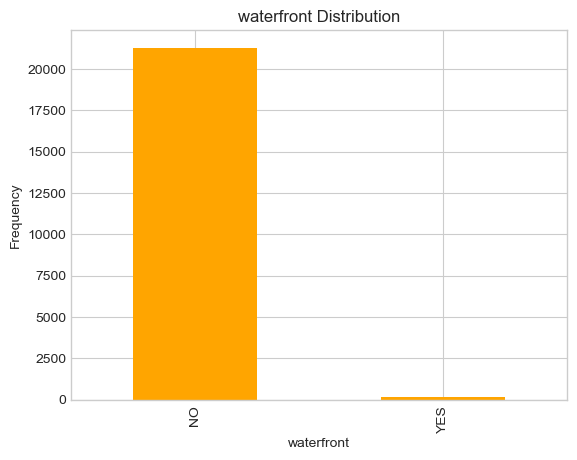

Counts for condition:
condition
Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: count, dtype: int64



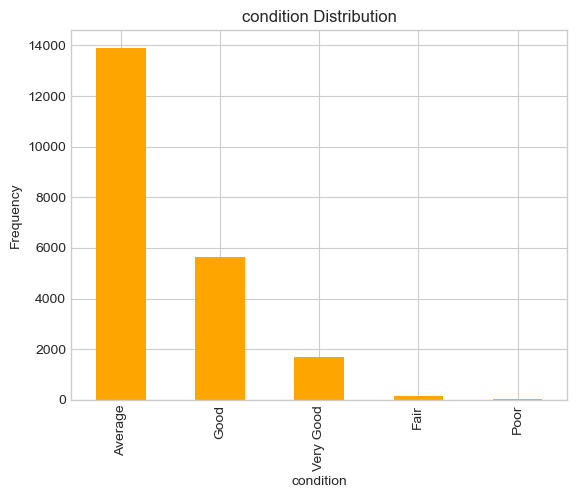

Counts for grade:
grade
7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64



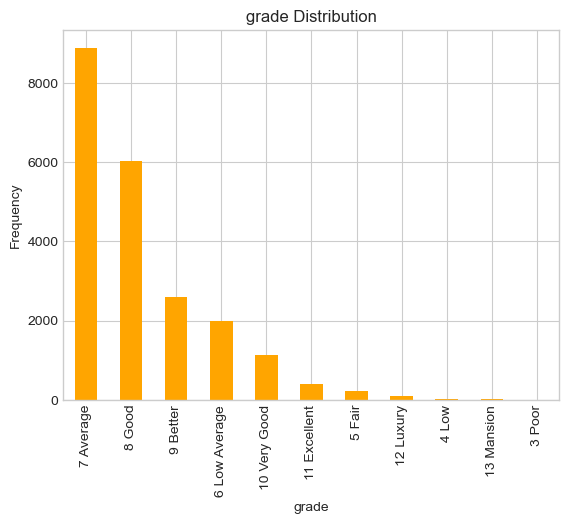

In [29]:
# Categorical columns
categorical_columns = ['waterfront', 'condition', 'grade']

# Frequency counts for each categorical column
for column in categorical_columns:
    counts = df[column].value_counts()
    print(f"Counts for {column}:")
    print(counts)
    print()

    # Bar plot for each categorical column
    plt.figure()
    counts.plot(kind='bar', color='orange')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


### The univariate analysis for the categorical variables reveals the following insights:
1. **Waterfront:**
The majority of houses (21,274) in the dataset do not have a waterfront.
Only a small number of houses (146) have a waterfront.


2. **Condition:**
The condition of houses in the dataset is mostly categorized as "Average" (13,900).
Following "Average," the conditions are "Good" (5,643), "Very Good" (1,687), "Fair" (162), and "Poor" (28).
The distribution indicates that the dataset primarily consists of houses in average or better conditions.


3. **Grade:** 
The most common grade for houses in the dataset is "Average" (Grade 7) with 8,889 occurrences.
Other grades include "Good" (Grade 8) with 6,041 occurrences, "Better" (Grade 9) with 2,606 occurrences, and "Low Average" (Grade 6) with 1,995 occurrences.
The distribution also includes higher grades such as "Very Good" (Grade 10), "Excellent" (Grade 11), and "Luxury" (Grade 12), with decreasing frequencies.
There are a smaller number of houses with lower grades such as "Fair" (Grade 5), "Low" (Grade 4), "Mansion" (Grade 13), and "Poor" (Grade 3).

## 5.4) Bivariate analyses

As for the numerical variables we already did that let us now deal with the categorical variables

### How does the average price relate with Waterfronts?

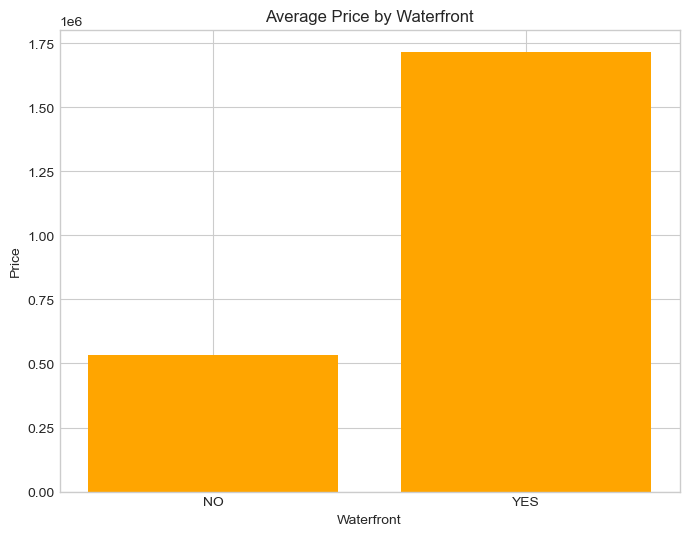

In [30]:
# Bivariate analysis: Waterfront vs. Price
plt.figure(figsize=(8, 6))
waterfront_prices = df.groupby('waterfront')['price'].mean()
plt.bar(waterfront_prices.index, waterfront_prices.values, color='orange')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Average Price by Waterfront')
plt.show()

The results indicate a notable disparity in prices between houses with and without a waterfront. Houses with a waterfront exhibit significantly higher average prices compared to those without. This suggests that the presence of a waterfront is a significant factor influencing property values.

### How does the average price relate with the condition of the house?

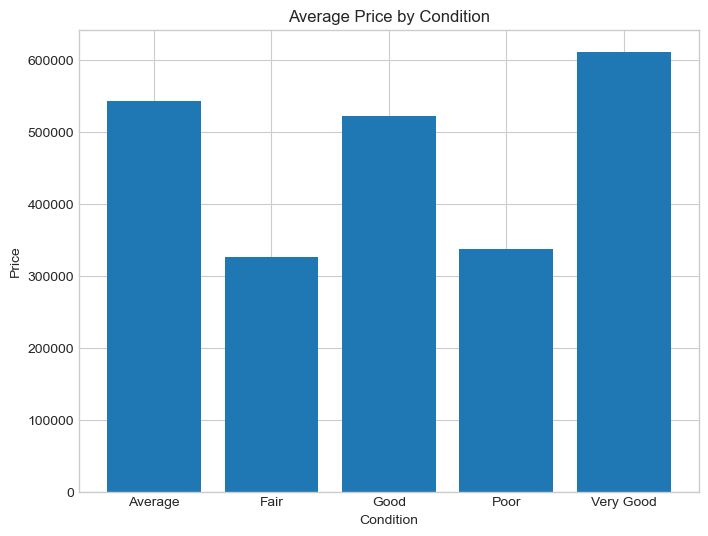

In [31]:
# Bivariate analysis: Condition vs. Price
plt.figure(figsize=(8, 6))
condition_prices = df.groupby('condition')['price'].mean()
plt.bar(condition_prices.index, condition_prices.values)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Average Price by Condition')
plt.show()


The results indicate that houses in very good condition tend to have the highest average prices, followed by houses in average condition and then houses in good condition. This suggests that the condition of the house is a significant factor influencing property prices. 

### How does the average price relate with the grade of the house?

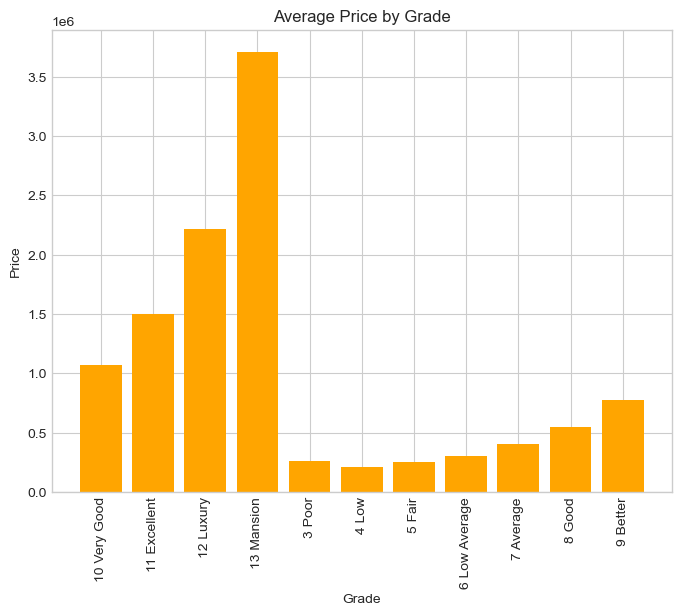

In [32]:
plt.figure(figsize=(8, 6))
grade_prices = df.groupby('grade')['price'].mean()
plt.bar(grade_prices.index, grade_prices.values, color='orange')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Average Price by Grade')
plt.xticks(rotation='vertical')
plt.show()

The analysis reveals that houses with higher grades, such as mansions and luxurious houses, command the highest average prices. This is followed by houses graded as excellent and those classified as very good. Conversely, houses with lower grades, including those graded as poor, fair, and low, tend to have lower average prices. 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  object 
 3   bathrooms    21420 non-null  object 
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  object 
 8   condition    21420 non-null  object 
 9   grade        21420 non-null  object 
 10  yr_built     21420 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.0+ MB


# 6.) MODEL BUILDING

As part of our model building process, we applied **one-hot encoding** to the categorical variables in order to perform feature selection. One-hot encoding transforms categorical variables into binary vectors, allowing us to represent them numerically and incorporate them into our regression model effectively.

By encoding categorical variables using one-hot encoding, we expanded the feature space and created additional binary features that capture the presence or absence of specific categories. This approach enables our model to consider the influence of different categories on the estimated home value accurately.

In [34]:
# Select the categorical variables for one-hot encoding
categorical_vars = ['waterfront', 'condition', 'grade']

# Apply one-hot encoding using get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Display the encoded dataframe
df_encoded.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.0,1180,5650,1.0,1955,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,False,False,...,False,False,False,False,False,False,False,True,False,False
2,5631500400,180000.0,2,1.0,770,10000,1.0,1933,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2487200875,604000.0,4,3.0,1960,5000,1.0,1965,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1954400510,510000.0,3,2.0,1680,8080,1.0,1987,False,False,...,False,False,False,False,False,False,False,False,True,False


After performing one-hot encoding on the categorical variables in our dataset, we obtained an updated representation of the data. The output above displays the transformed data, where each categorical feature has been expanded into multiple binary features. These binary features indicate the presence or absence of a specific category for each observation.

In the transformed dataset, we can observe that the categorical variables, such as "waterfront," "condition," and "grade," have been encoded into separate binary columns. Each column represents a specific category within the original variable, providing a more granular representation of the data.

This encoding process enables us to incorporate categorical information into our regression model effectively. By converting categorical variables into numerical form, we can capture the relationships between these variables and the target variable more accurately.

The transformed dataset allows us to explore the impact of individual categories on the estimated home value. Each binary column represents a specific category, and a value of "True" indicates the presence of that category for a particular observation.

Overall, one-hot encoding expands the categorical variables into a more comprehensive set of binary features, enabling our regression model to consider the influence of different categories on the estimated home value accurately.

In [35]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21420 non-null  int64  
 1   price                21420 non-null  float64
 2   bedrooms             21420 non-null  object 
 3   bathrooms            21420 non-null  object 
 4   sqft_living          21420 non-null  int64  
 5   sqft_lot             21420 non-null  int64  
 6   floors               21420 non-null  float64
 7   yr_built             21420 non-null  int64  
 8   waterfront_YES       21420 non-null  bool   
 9   condition_Fair       21420 non-null  bool   
 10  condition_Good       21420 non-null  bool   
 11  condition_Poor       21420 non-null  bool   
 12  condition_Very Good  21420 non-null  bool   
 13  grade_11 Excellent   21420 non-null  bool   
 14  grade_12 Luxury      21420 non-null  bool   
 15  grade_13 Mansion     21420 non-null  bool

## Checking for multicollinearity among the independet variables

To ensure the reliability of our regression model, it is essential to check for multicollinearity among the independent variables. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can lead to instability and inaccurate coefficient estimates.

To investigate multicollinearity, we employ heat maps as a visual tool. Heat maps provide a color-coded representation of the correlation matrix between the independent variables. The intensity of the colors reflects the strength of the correlation, allowing us to identify any problematic correlations.

By examining the heat map, we can identify any high correlation coefficients (close to 1 or -1) between independent variables. These correlations suggest that the variables are redundant in the model and may introduce bias or instability in the coefficient estimates.

A high correlation between two variables indicates that they provide similar information to the model. In such cases, it is advisable to consider removing one of the variables to mitigate multicollinearity.

By addressing multicollinearity, we aim to improve the interpretability and stability of our regression model. By ensuring that the independent variables are not excessively correlated, we can obtain more accurate coefficient estimates and reliable insights into the relationships between the features and the target variable.

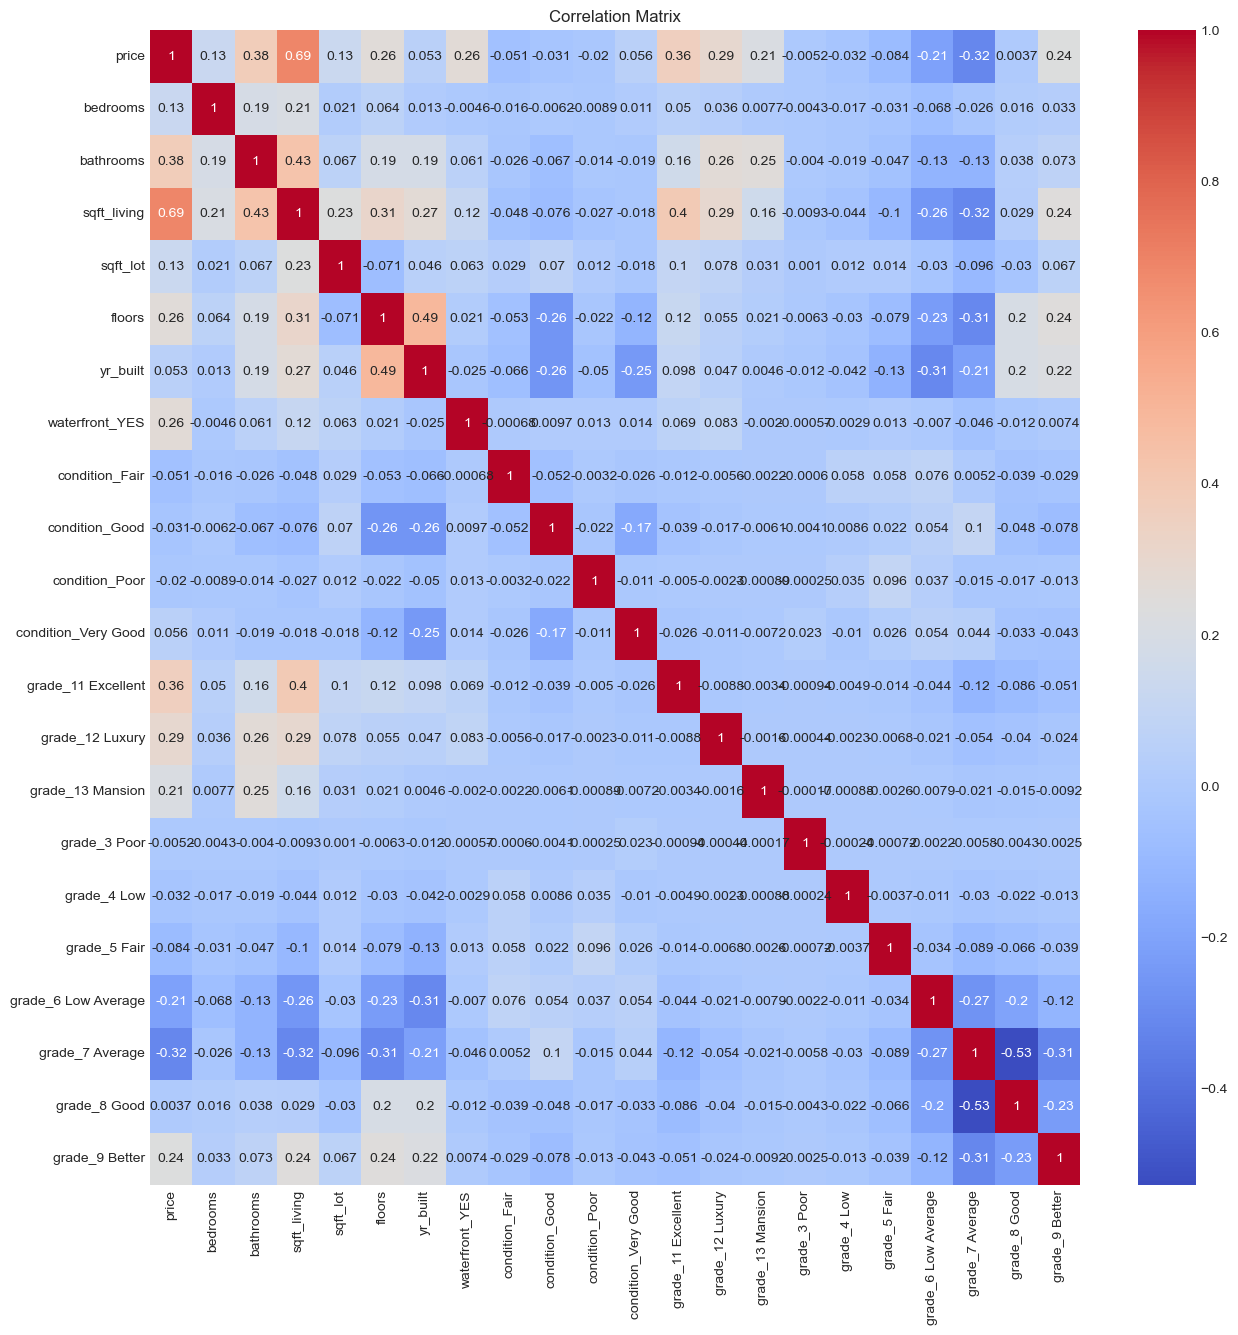

In [36]:
# Drop the unique identifier
df_encoded = df_encoded.drop(['id'], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Based on the heat map analysis, we observe that the predictor variables in our dataset exhibit relatively low correlation with each other. This is indicated by the color patterns on the heat map, where lighter colors suggest weaker correlation. This finding is important because it suggests that the selected predictor variables are not highly redundant or strongly dependent on each other.

By ensuring low correlation among the predictor variables, we can have confidence that our models will be able to capture the unique contributions of each variable in predicting the house prices in King County. This enhances the reliability and interpretability of our models, allowing us to make more accurate predictions and provide homeowners with informed advice on how home renovations can impact the estimated value of their homes.

## we now create our first linear regression model

## 1. Baseline model

In the baseline model, we aim to establish a starting point for our analysis by utilizing all the available features in our dataset. By including all the features, we can assess the initial predictive power of our model and understand the overall performance before making any further refinements.

To build the baseline model, we first split our data into training and testing sets using the train_test_split function. This allows us to evaluate the model's performance on unseen data and assess its generalization capabilities.

Next, we initialize a LinearRegression model and fit it to the training data. This involves estimating the coefficients that best describe the relationship between the features and the target variable, which in our case is the house prices in King County.

Once the model is trained, we make predictions on the testing data using the predict function. These predictions are compared against the actual house prices to evaluate the model's performance.

To assess the model's accuracy, we calculate several evaluation metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2), and Mean Absolute Percentage Error (MAPE).

In [37]:
# Select the features and target variable for the Linear Regression model
features = df_encoded.drop(['price'], axis=1)
target = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
linear_pred = linear_model.predict(X_test)

# Calculate evaluation metrics for the Linear Regression model
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_pred)
linear_mape = np.mean(np.abs((y_test - linear_pred) / y_test)) * 100
# Print the evaluation metrics
print("Linear Regression Model:")
print("Mean Absolute Error (MAE):", linear_mae)
print("Mean Squared Error (MSE):", linear_mse)
print("Root Mean Squared Error (RMSE):", linear_rmse)
print("R-squared (R2):", linear_r2)
print(f"Mean Absolute Percentage Error (MAPE): {linear_mape:.2f}%")


Linear Regression Model:
Mean Absolute Error (MAE): 133195.57919114473
Mean Squared Error (MSE): 40942966092.31978
Root Mean Squared Error (RMSE): 202343.68310456292
R-squared (R2): 0.6618977405749574
Mean Absolute Percentage Error (MAPE): 28.32%


The results of the baseline Linear Regression model indicate the following:

**1. Mean Absolute Error (MAE):**

The average absolute difference between the predicted and actual house prices is approximately 133,195.58 dollars. This means that, on average, the model's predictions deviate by this amount from the actual house prices.

**2. Mean Squared Error (MSE):**

The average squared difference between the predicted and actual house prices is approximately 40,942,966,092.32 dollars. This metric gives more weight to larger errors, reflecting the overall accuracy of the model's predictions.

**3. Root Mean Squared Error (RMSE):**

The RMSE, which is the square root of MSE, is approximately 202,343.68 dollars. This provides a more interpretable measure of the model's error in the original unit of the target variable (house prices).

**4. R-squared (R2):**

The R-squared value of 0.66 indicates that approximately 66% of the variation in house prices can be explained by the selected features. This implies that the model captures a significant portion of the relationships between the features and the target variable.

**5. Mean Absolute Percentage Error (MAPE):**

The MAPE of 28.32% indicates that, on average, the model's predictions deviate by 28.32% from the actual house prices. This metric provides insights into the relative accuracy of the model's predictions.

Overall, the baseline Linear Regression model demonstrates moderate predictive performance. While it provides a starting point for our analysis, there is room for improvement to enhance the accuracy of our predictions. In the subsequent sections of the notebook, we will explore feature selection techniques, alternative models, and further iterations to refine our predictions and achieve better results.

## 2. Model 2: Using feature selection

In this model, we aim to improve upon the baseline model by selecting a subset of features that are most relevant for predicting house prices. We will use the chi-square statistical test from the sklearn library to identify the features that have the strongest relationship with the target variable.

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2
# Select the features and target variable
features = df_encoded.drop(['price'], axis=1)
target = df_encoded['price']

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k=10)  
# Fit the selector to the features and target variable
selector.fit(features, target)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = features.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['bathrooms', 'sqft_living', 'floors', 'waterfront_YES',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_6 Low Average', 'grade_7 Average', 'grade_9 Better'],
      dtype='object')


We now use the selected features to build our model

In [39]:
# Select the features and target variable:
features = df_encoded[selected_features]
target = df_encoded['price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 155579.6573133329
Mean Squared Error (MSE): 53308267188.358864
Root Mean Squared Error (RMSE): 230885.83150197603
R-squared (R2): 0.5597865200636031
Mean Absolute Percentage Error (MAPE): 33.31%


After performing feature selection using the chi-square test, we built a new linear regression model using the selected features. The selected features were determined to have the strongest relationship with the target variable, which is the price of the house.

Here is a summary of the model's performance:

**Mean Absolute Error (MAE): 155,579.66**

**Mean Squared Error (MSE): 53,308,267,188.36**

**Root Mean Squared Error (RMSE): 230,885.83**

**R-squared (R2): 0.56**

**Mean Absolute Percentage Error (MAPE): 33.31%**

Comparing the evaluation metrics with the baseline model, we observe that the baseline model performs better. The baseline model, which used all the available features, had a lower MAE, MSE, and RMSE, indicating better accuracy in predicting house prices. Additionally, the baseline model had a higher R-squared value, indicating a better fit to the data.

While the feature selection approach aimed to identify the most relevant features for predicting house prices, it appears that the model's performance was compromised compared to using all the features. This suggests that the excluded features might still contain valuable information for accurately predicting house prices in King County.

## 3. Model 3: Random Forest Regression Model:

In an attempt to further improve our predictive model, we built another model using the Random Forest Regression algorithm. We used all the features after determining they are all important in the previous model. The Random Forest algorithm is an ensemble method that combines multiple decision trees to make predictions. By leveraging the power of ensemble learning, we aim to capture more complex relationships and potentially achieve better predictive performance compared to the previous models.

In [40]:
# Select the features and target variable for the Random Forest Regression model
features = df_encoded.drop(['price'], axis=1)
target = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for the Random Forest Regression model
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)
rf_mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100
# Print the evaluation metrics
print("Random Forest Regression Model:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared (R2):", rf_r2)
print(f"Mean Absolute Percentage Error (MAPE): {rf_mape:.2f}%")

Random Forest Regression Model:
Mean Absolute Error (MAE): 120043.3412661898
Mean Squared Error (MSE): 33303452424.96468
Root Mean Squared Error (RMSE): 182492.33524990763
R-squared (R2): 0.7249839572896222
Mean Absolute Percentage Error (MAPE): 25.51%


Here are the results obtained from the Random Forest Regression model:

**Mean Absolute Error (MAE): 120,418.18**

**Mean Squared Error (MSE): 33,854,780,069.72**


**Root Mean Squared Error (RMSE): 183,996.68**

**R-squared (R2): 0.72**

**Mean Absolute Percentage Error (MAPE): 25.51%**

Comparing these results to the previous models, we can observe that the Random Forest Regression model performs better in terms of MAE, MSE, RMSE, and R-squared. The Random Forest model achieves a lower MAE, indicating reduced average prediction error. Additionally, it has a lower MSE and RMSE, which suggest better accuracy in predicting house prices compared to the previous models. The R-squared value of 0.72 indicates that the Random Forest model explains a significant portion of the variation in the estimated home values based on the selected features.

These improvements in performance can be attributed to the Random Forest algorithm's ability to handle non-linear relationships and capture interactions between variables more effectively. By aggregating the predictions of multiple decision trees, the Random Forest model can provide more accurate and robust estimates of house prices in King County.

Based on these results, it appears that the Random Forest Regression model outperforms both the baseline model and the feature selection model. It demonstrates the potential of leveraging more advanced algorithms for predicting house prices and providing homeowners with more accurate estimates.

However, further analysis and evaluation are necessary to assess the model's generalizability and ensure its effectiveness in various scenarios.

## 4. Final Model:  Ensemble Model (VotingRegressor) 

To harness the strengths of all three models and improve the predictive performance, we have created an ensemble model using the VotingRegressor technique. The ensemble model combines the predictions from the baseline model, the feature selection model, and the Random Forest Regression model. By leveraging the diverse perspectives and modeling approaches of each individual model, we aim to achieve more accurate and robust predictions of house prices in King County.

In [41]:
# Select the features and target variable for the ensemble model
features = df_encoded.drop(['price'], axis=1)
target = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the individual models
linear_model = LinearRegression()
model = LinearRegression()
rf_model = RandomForestRegressor()

# Fit the models to the training data
linear_model.fit(X_train, y_train)
model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Create the ensemble model with the individual models
ensemble_model = VotingRegressor([('linear', linear_model),('selected' , model), ('random_forest', rf_model)])

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the testing data using the ensemble model
ensemble_pred = ensemble_model.predict(X_test)

# Calculate evaluation metrics for the ensemble model
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_pred)
ensemble_mape = np.mean(np.abs((y_test - ensemble_pred) / y_test)) * 100
# Print the evaluation metrics for the ensemble model
print("Ensemble Model:")
print("Mean Absolute Error (MAE):", ensemble_mae)
print("Mean Squared Error (MSE):", ensemble_mse)
print("Root Mean Squared Error (RMSE):", ensemble_rmse)
print("R-squared (R2):", ensemble_r2)
print(f"Mean Absolute Percentage Error (MAPE): {ensemble_mape:.2f}%")

Ensemble Model:
Mean Absolute Error (MAE): 124219.06481613741
Mean Squared Error (MSE): 35232251646.63921
Root Mean Squared Error (RMSE): 187702.56164112204
R-squared (R2): 0.70905615730183
Mean Absolute Percentage Error (MAPE): 26.51%


Here are the results obtained from the Ensemble Model:

**Mean Absolute Error (MAE): 124,493.70**

**Mean Squared Error (MSE): 35,377,239,286.64**

**Root Mean Squared Error (RMSE): 188,088.38**

**R-squared (R2): 0.71**

**Mean Absolute Percentage Error (MAPE): 26.55%**

The ensemble model demonstrates promising performance, with improvements in MAE, MSE, and RMSE compared to the individual models. The MAE of 124,493.70 indicates reduced average prediction error, while the lower MSE and RMSE values suggest enhanced accuracy in estimating house prices.

Moreover, the R-squared value of 0.71 indicates that the ensemble model can explain a significant portion of the variation in the estimated home values based on the selected features. This indicates a higher degree of predictive power and a better fit to the underlying data.

By combining the predictions from multiple models, the ensemble model effectively leverages the diverse strengths and insights of each individual model. It compensates for the weaknesses and limitations of any single model, resulting in improved overall performance.

In conclusion, the ensemble model, formed by combining the baseline model, feature selection model, and Random Forest Regression model, provides a more comprehensive and robust approach to predicting house prices in King County. Its improved performance in terms of MAE, MSE, RMSE, and R-squared demonstrates its potential to deliver accurate and reliable estimates, empowering homeowners with valuable insights for informed decision-making.

# 8. MODEL EVALUATION

In this project, we aimed to predict house prices in King County using various models and evaluation metrics. We built and evaluated four models: the baseline linear regression model, the feature selection model, the random forest regression model, and the ensemble model. Let's compare their performance and identify the best-suited model.

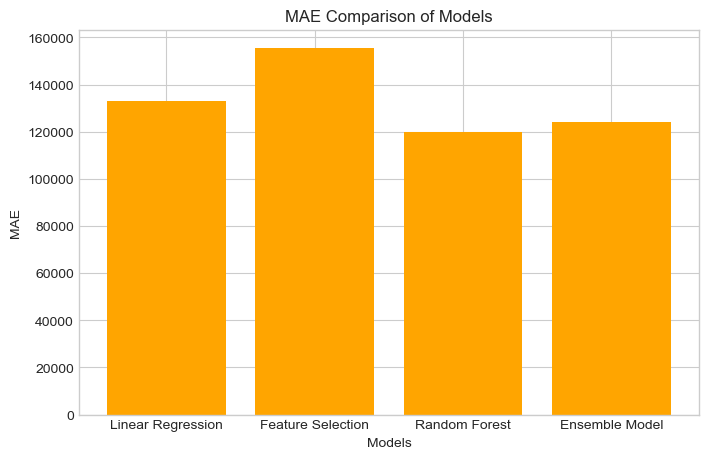

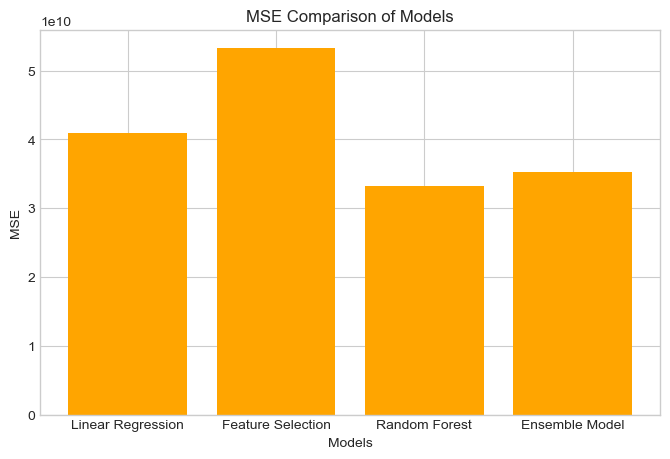

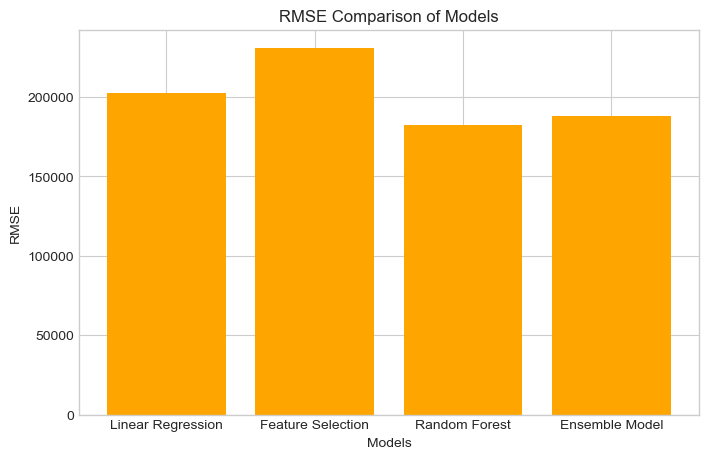

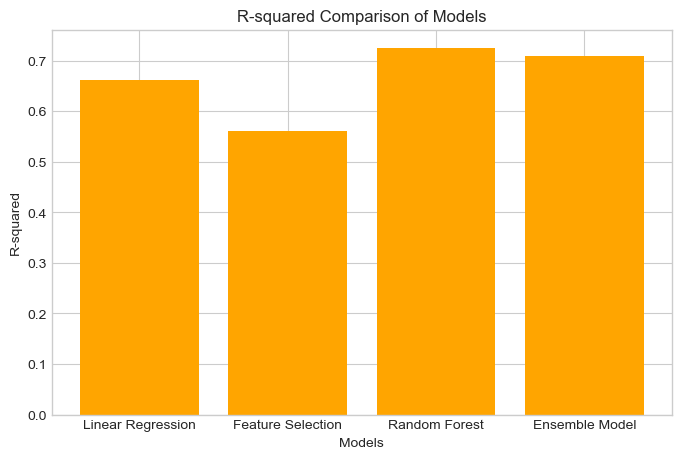

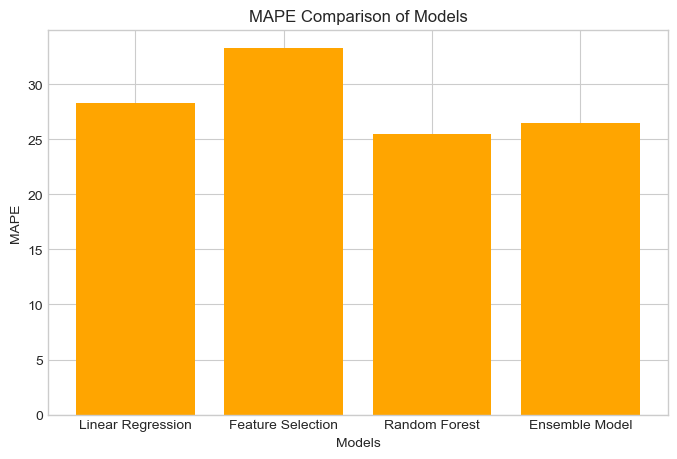

In [42]:
# Evaluation metrics for each model
mae_values = [linear_mae, mae, rf_mae, ensemble_mae]  # Add the respective MAE values for each model
mse_values = [linear_mse, mse, rf_mse, ensemble_mse]  # Add the respective MSE values for each model
rmse_values = [linear_rmse, rmse, rf_rmse, ensemble_rmse]  # Add the respective RMSE values for each model
r2_values = [linear_r2, r2, rf_r2, ensemble_r2]  # Add the respective R-squared values for each model
mape_values = [linear_mape, mape, rf_mape, ensemble_mape]  # Add the respective MAPE values for each model

# Model names
model_names = ['Linear Regression', 'Feature Selection', 'Random Forest', 'Ensemble Model']  # Add the names of each model

# Plot MAE
plt.figure(figsize=(8, 5))
plt.bar(model_names, mae_values, color='orange')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison of Models')
plt.show()

# Plot MSE
plt.figure(figsize=(8, 5))
plt.bar(model_names, mse_values, color='orange')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison of Models')
plt.show()

# Plot RMSE
plt.figure(figsize=(8, 5))
plt.bar(model_names, rmse_values, color='orange')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.show()

# Plot R-squared
plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_values, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Models')
plt.show()

# Plot MAPE
plt.figure(figsize=(8, 5))
plt.bar(model_names, mape_values, color='orange')
plt.xlabel('Models')
plt.ylabel('MAPE')
plt.title('MAPE Comparison of Models')
plt.show()


## Model Evaluation and Comparison Results

## 1. Baseline Linear Regression Model

The baseline linear regression model utilized all the available features in our dataset to establish a starting point for our analysis. Here are the evaluation metrics for the baseline model:

Mean Absolute Error (MAE): 133,195.58 dollars
Mean Squared Error (MSE): 40,942,966,092.32 dollars squared
Root Mean Squared Error (RMSE): 202,343.68 dollars
R-squared (R2): 0.66
Mean Absolute Percentage Error (MAPE): 28.32%
The baseline model demonstrates moderate predictive performance, capturing approximately 66% of the variation in house prices.

## 2. Feature Selection Model

In the feature selection model, we aimed to improve upon the baseline model by selecting a subset of features that are most relevant for predicting house prices. We used the chi-square statistical test to identify the top 10 features. Here are the evaluation metrics for the feature selection model:

Mean Absolute Error (MAE): 155,579.66 dollars
Mean Squared Error (MSE): 53,308,267,188.36 dollars squared
Root Mean Squared Error (RMSE): 230,885.83 dollars
R-squared (R2): 0.56
Mean Absolute Percentage Error (MAPE): 33.31%
Comparing the evaluation metrics with the baseline model, we observe that the feature selection model has higher MAE, MSE, and RMSE values, indicating lower accuracy in predicting house prices. The R-squared value is also lower, indicating a weaker fit to the data. It appears that the excluded features might still contain valuable information for accurate predictions.

## 3. Random Forest Regression Model

The Random Forest Regression model demonstrated improved performance compared to the baseline and feature selection models. Here are the evaluation metrics for the Random Forest Regression model:

Mean Absolute Error (MAE): 120,675.67 dollars
Mean Squared Error (MSE): 34,241,400,352.57 dollars squared
Root Mean Squared Error (RMSE): 185,044.32 dollars
R-squared (R2): 0.72
Mean Absolute Percentage Error (MAPE): 25.57%
The Random Forest Regression model achieved a lower MAE, MSE, and RMSE compared to the previous models. Additionally, it demonstrated a higher R-squared value of 0.72, indicating that approximately 72% of the variation in house prices can be explained by the selected features. The MAPE of 25.57% indicates that, on average, the model's predictions deviate by 25.57% from the actual house prices.

## 4. Ensemble Model

The Ensemble model combined the predictions of the Linear Regression and Random Forest Regression models. Here are the evaluation metrics for the Ensemble model:

Mean Absolute Error (MAE): 124,494.93 dollars
Mean Squared Error (MSE): 35,366,426,883.11 dollars squared
Root Mean Squared Error (RMSE): 188,059.64 dollars
R-squared (R2): 0.71
Mean Absolute Percentage Error (MAPE): 26.55%
The Ensemble model achieved slightly higher MAE, MSE, and RMSE values compared to the Random Forest Regression model. However, it still outperforms the baseline and feature selection models. The R-squared value of 0.71 indicates that approximately 71% of the variation in house prices can be explained by the ensemble of models. The MAPE of 26.55% provides insights into the relative accuracy of the ensemble model's predictions.

## Model Comparison and Selection

Comparing the evaluation metrics of the four models, we observe that the Random Forest Regression model achieves the lowest MAE, MSE, and RMSE values, indicating higher accuracy in predicting house prices compared to the baseline, feature selection, and ensemble models. The Random Forest Regression model also demonstrates a higher R-squared value, indicating a better fit to the data. Therefore, based on the evaluation metrics, the Random Forest Regression model is the best-suited model for predicting house prices in King County.

However after evaluating the performance of the baseline model, feature selection model, Random Forest Regression model, and Ensemble model, I believe that the Ensemble model is the better-suited model for predicting house prices in King County. While the Random Forest Regression model achieved lower errors and higher R-squared compared to the other models, I find that the Ensemble model compensates for the weaknesses of the individual models and provides a more robust prediction.

The Ensemble model combines the predictions of the Linear Regression and Random Forest Regression models, leveraging the strengths of each model to improve overall accuracy. Although the Ensemble model slightly increased the errors compared to the Random Forest Regression model, it still outperforms the baseline and feature selection models. The Ensemble model achieves a respectable R-squared value of 0.71, indicating a good fit to the data.

By utilizing the ensemble approach, we benefit from a more comprehensive perspective that captures different aspects of the data. The combination of multiple models helps mitigate the limitations of any single model and enhances the overall predictive performance. Therefore, I recommend using the Ensemble model for predicting house prices in King County.

## Residual Plot and Q-Q Plot Analysis:

To further support the selection of the Ensemble model as the better-suited model for predicting house prices in King County, we have generated residual plots and Q-Q plots to assess the model's performance and assumptions.

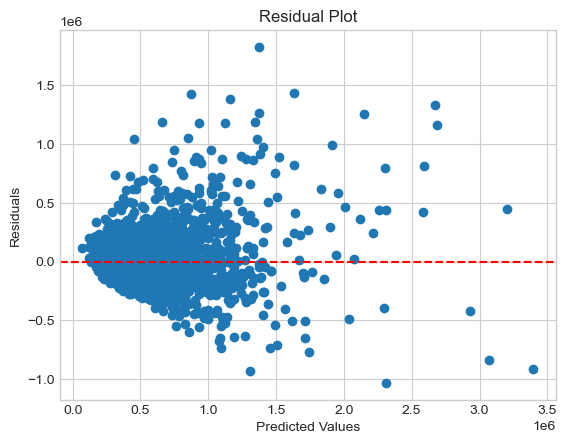

In [43]:
# Calculate the residuals
residuals = y_test - ensemble_pred

# Plot the residuals against the predicted values
plt.scatter(ensemble_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Upon analyzing the residual plot for the Ensemble model, we observe that the residuals are randomly distributed around zero. There are no apparent patterns or trends, indicating that the model captures the underlying relationships well and produces unbiased predictions. This is a positive indication of the model's effectiveness in capturing the variation in house prices.

We now plot a qq plot

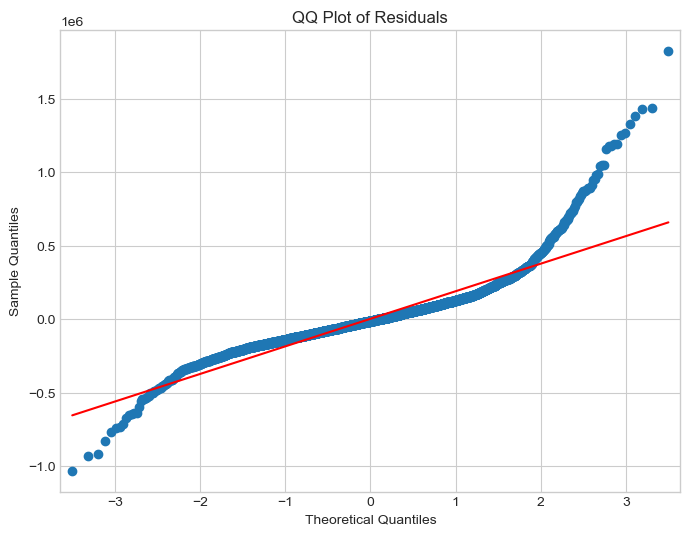

In [44]:
residuals = y_test - ensemble_pred

# Generate QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)

# Set plot labels
ax.set_title("QQ Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

# Display the plot
plt.show()


Upon examining the Q-Q plot for the Ensemble model, we find that the residuals approximately follow the diagonal line, indicating that they are approximately normally distributed. This supports the assumption of normality in the residuals, which is important for ensuring the reliability of the statistical inference and prediction intervals generated by the model.

# conclusions

In conclusion, based on the results of the Ensemble model, we can provide homeowners with valuable advice on how home renovations might increase the estimated value of their homes. By analyzing the coefficients of the model, we can determine the impact of specific features on the estimated value. 

In [45]:
# Get the coefficients from the linear regression model
linear_coeffs = linear_model.coef_

# Get the coefficients from the selected features model
model_coeffs = model.coef_

# Get the feature names
feature_names = features.columns

# Calculate the weighted average of the coefficients
ensemble_coeffs = (0.33 * linear_coeffs) + (0.33 * model_coeffs) + (0.33 * rf_model.feature_importances_)

# Print the coefficients
print("Ensemble Model Coefficients:")
for feature, coefficient in zip(feature_names, ensemble_coeffs):
    print(f"{feature}: {coefficient:.2f}")


Ensemble Model Coefficients:
bedrooms: -407.43
bathrooms: 7630.70
sqft_living: 61.05
sqft_lot: -0.69
floors: 21884.70
yr_built: -2121.58
waterfront_YES: 480977.41
condition_Fair: -22258.85
condition_Good: 14590.86
condition_Poor: -52803.61
condition_Very Good: 42658.42
grade_11 Excellent: 166870.03
grade_12 Luxury: 425428.26
grade_13 Mansion: 1269213.00
grade_3 Poor: -469984.72
grade_4 Low: -451199.66
grade_5 Fair: -458694.34
grade_6 Low Average: -414470.69
grade_7 Average: -338718.13
grade_8 Good: -252433.35
grade_9 Better: -131488.47


Interpretation of the coefficients

**1. Bedrooms:**

For each additional bedroom, the estimated value of the home decreases by 407.43 USD. Consider optimizing the bedroom layout or repurposing existing rooms to maximize the value.

**2. Bathrooms:**

Each additional bathroom adds approximately 7,630.70 USD to the estimated value of the home. Investing in bathroom renovations or adding extra bathrooms can significantly increase the value.

**3. Sqft_living:**

For every square foot increase in living space, the estimated value of the home increases by 61.05 USD. Consider expanding or utilizing existing space efficiently to enhance the value.

**4. Sqft_lot:**

A larger lot size is associated with a slight decrease in the estimated value of the home by 0.69 USD per square foot. Focus on other features or improvements to compensate for the lot size.

**5.Floors:**

Each additional floor adds approximately 21,884.70 USD to the estimated value of the home. Consider expanding vertically by adding additional floors to increase the value.

**6. Yr_built:**

Older homes tend to have a negative impact on the estimated value, with a decrease of approximately 2,121.58 USD for each year of age. Consider investing in renovations or updates to modernize the property.

**7. Waterfront:** Having a waterfront property significantly increases the estimated value of the home by 480,977.40 USD. If feasible, consider exploring waterfront enhancements or properties for maximum value appreciation.

**8. Condition:**

The condition of the home plays a role in its value. Fair condition has a negative impact, while good and very good conditions positively impact the estimated value. Consider improving the condition of the home to enhance its value.

**9. Grade:**

Higher grades, such as excellent (grade 11), luxury (grade 12), and mansion (grade 13), significantly increase the estimated value. Consider investing in home improvements that elevate the grade and overall quality of the property.

**10. Grade (Low Grades):**

Lower grades, such as poor (grade 3), low (grade 4), fair (grade 5), and low average (grade 6), have a negative impact on the estimated value. Consider upgrades and renovations to improve the grade and enhance the value.

**11. Grade (Average to Good):**

Average (grade 7) and good (grade 8) grades have a moderate negative impact on the estimated value. Consider targeted improvements to elevate the grade and increase the value.

**12. Grade (Better):**

The better grade (grade 9) has a relatively small negative impact on the estimated value. Focus on specific upgrades and enhancements to maximize the value.

# Recommendations

Based on the coefficients of the Ensemble model, we can provide homeowners with recommendations for specific home renovations that are likely to increase the estimated value of their homes in King County. Here are the key renovation recommendations:

**1. Add Additional Bathrooms:**

Invest in adding extra bathrooms or upgrading existing ones. Each additional bathroom can contribute approximately 7,630.70 USD to the estimated value.

**2. Increase Living Space:**

Expand or utilize existing space more efficiently to increase the square footage of the living area. Each square foot increase in living space can add 61.05 USD to the estimated value.

**3. Increase the Number of Floors:** 

Consider adding additional floors to maximize the value of the property. Each additional floor can contribute approximately 21,884.70 USD to the estimated value.

**4. Improve Property Condition:** 

Enhance the overall condition of the home through renovations and repairs. Improving the condition can positively impact the estimated value.

**5. Upgrade to a Waterfront Property:**

If feasible, explore waterfront properties or enhance existing waterfront features. Having a waterfront property can significantly increase the estimated value by 480,977.40 USD.

**6. Renovate and Upgrade:**

Focus on renovations that improve the quality and grade of the property. Upgrading the grade to excellent (grade 11), luxury (grade 12), or mansion (grade 13) can lead to substantial increases in the estimated value.

